# Capstone Project : Exploratory Data Analysis of U.S. Flight Delays and Airline Performance 

## 1️⃣ Project Title and Introduction:

**Title:**  Analyzing Airline Operations and Delay Patterns in the U.S.

This project explores flight and airline data across the U.S. in 2015 to identify trends in flight volumes, delay frequencies, and overall airline performance. The analysis aims to uncover which airlines manage their operations efficiently and which experience higher delay rates. Insights from this study can support operational improvements, customer satisfaction strategies, and industry benchmarking.


## 2️⃣ Scoping Your Data Analysis Project

**Key Questions:**
- Which airlines operate the most flights, and how frequent are delays?  
- How do flight volume and delay rates vary across months?  
- Which airlines demonstrate high reliability (low delays, high traffic)?  
- What actionable insights can help benchmark airline performance?
 decision-making?

**Datasets:**
- `airlines.csv` (14 rows × 2 columns)
- `flights.csv` (5,819,079 rows × 31 columns)

**Data types:** tabular, time series, categorical, numerical  
**Time range:** 12 months (2015)
  
**Relationships Between Data Columns**

1. Month vs Flight Volume
- Reveals seasonal trends in total flights. Peak travel months (e.g., summer) show higher activity, while off-peak months show lower flight volumes.

2. Delay Status
- Shows whether departures happen as scheduled. Helps identify patterns in delayed flights across time and airlines.

3. Month vs Flight Delays
- Explores when delays are most common. Highlights months when airlines experience operational strain.

4. Airline vs Delay Rate
- Benchmarks airline performance by calculating the proportion of delayed flights relative to total flights. Lower delay rates indicate more efficient airlines.

5. Total Flights vs Delay Rate
- Evaluates performance across two dimensions — flight volume and reliability. Airlines can be categorized into quadrants (e.g., High Volume & Low Delay = Top Performers) to identify best and worst performers.

## 3️⃣Data Preparation

### A. Load Libraries & Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter


In [60]:
# Load the datasets airlines
airlines = pd.read_csv('airlines.csv')

# Check the dimensions of airlines.csv DataFrame
airlines.shape

(14, 2)

In [2]:
# Preview the top rows of airlines.csv data
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [4]:
# Load the datasets flights
flights = pd.read_csv('flights.csv')

# Check the dimensions of flights.csv DataFrame
flights.shape


/var/folders/48/lvr8_0f171g50xz10hjt2ldr0000gn/T/ipykernel_1172/367430167.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('flights.csv')


(5819079, 31)

In [6]:
# Preview the top rows of fliggts.csv data
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# Check data type of each column in flights.csv DataFrame
flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

### B. Handling Missing Values

- Handle missing values in both datasets 
- Standardize inconsistent data formats 


In [63]:
# Check missing values of airlines.csv datasets
print("Missing Values flights.csv Count:\n\n", airlines.isnull().sum())

Missing Values flights.csv Count:

 IATA_CODE    0
AIRLINE      0
dtype: int64


In [64]:
# Check missing values of flights.csv datasets
print("Missing Values flights.csv Count:\n\n", flights.isnull().sum())


Missing Values flights.csv Count:

 YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dty

In [5]:
# Drop columns with too many missing values

flights_cleaned = flights.dropna(thresh=len(flights) - 87000, axis=1)

#Verify if the process was completed by checking the number of remaining missing values
print("Missing values after cleaning:")
print(flights_cleaned.isnull().sum())

Missing values after cleaning:
YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER            14721
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME         86153
DEPARTURE_DELAY        86153
SCHEDULED_TIME             6
DISTANCE                   0
SCHEDULED_ARRIVAL          0
DIVERTED                   0
CANCELLED                  0
dtype: int64


### C. Data Transformation
- Ensure data types and formatting are consistent.
- Create new columns that are helpful for data analysis

In [8]:
# check data type of flights datasets ater droping column
flights_cleaned.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
SCHEDULED_TIME         float64
DISTANCE                 int64
SCHEDULED_ARRIVAL        int64
DIVERTED                 int64
CANCELLED                int64
dtype: object

In [6]:
# Copy data
flights_transformed = flights_cleaned.copy()

# Convert times to datetime
flights_transformed['SCHEDULED_DEPARTURE_dt'] = pd.to_datetime(
    flights_transformed['SCHEDULED_DEPARTURE'].astype(str).str.zfill(4), format='%H%M') 

flights_transformed['DEPARTURE_TIME_dt'] = flights_transformed['SCHEDULED_DEPARTURE_dt'] + \
    pd.to_timedelta(flights_transformed['DEPARTURE_TIME'], unit='m')

flights_transformed['SCHEDULED_ARRIVAL_dt'] = flights_transformed['SCHEDULED_DEPARTURE_dt'] + \
    pd.to_timedelta(flights_transformed['SCHEDULED_TIME'], unit='m')

# Format as HHMM
flights_transformed['SCHEDULED_DEPARTURE_'] = flights_transformed['SCHEDULED_DEPARTURE_dt'].dt.strftime('%H%M')
flights_transformed['DEPARTURE_TIME_'] = flights_transformed['DEPARTURE_TIME_dt'].dt.strftime('%H%M')
flights_transformed['SCHEDULED_ARRIVAL_'] = flights_transformed['SCHEDULED_ARRIVAL_dt'].dt.strftime('%H%M')

print(flights_transformed[['SCHEDULED_DEPARTURE_', 'DEPARTURE_TIME_', 'SCHEDULED_ARRIVAL_']].head())


  SCHEDULED_DEPARTURE_ DEPARTURE_TIME_ SCHEDULED_ARRIVAL_
0                 0005            1519               0330
1                 0010            0012               0450
2                 0020            0038               0506
3                 0020            0035               0505
4                 0025            0049               0420


In [7]:
# Drop intermediate columns
flights_transformed.drop(columns=[
    'SCHEDULED_DEPARTURE',
    'SCHEDULED_DEPARTURE_dt',
    'DEPARTURE_TIME',
    'DEPARTURE_TIME_dt',
    'SCHEDULED_ARRIVAL',
    'SCHEDULED_ARRIVAL_dt'
], inplace=True, errors='ignore')

flights_transformed.head()


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,SCHEDULED_TIME,DISTANCE,DIVERTED,CANCELLED,SCHEDULED_DEPARTURE_,DEPARTURE_TIME_,SCHEDULED_ARRIVAL_
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,-11.0,205.0,1448,0,0,0005,1519,0330
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,-8.0,280.0,2330,0,0,0010,0012,0450
2,2015,1,1,4,US,840,N171US,SFO,CLT,-2.0,286.0,2296,0,0,0020,0038,0506
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,-5.0,285.0,2342,0,0,0020,0035,0505
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,-1.0,235.0,1448,0,0,0025,0049,0420


In [112]:
# Recheck flights datatypes after converting format as HHMM
flights_transformed.dtypes

YEAR                      int64
MONTH                     int64
DAY                       int64
DAY_OF_WEEK               int64
AIRLINE                  object
FLIGHT_NUMBER             int64
TAIL_NUMBER              object
ORIGIN_AIRPORT           object
DESTINATION_AIRPORT      object
DEPARTURE_DELAY         float64
SCHEDULED_TIME          float64
DISTANCE                  int64
DIVERTED                  int64
CANCELLED                 int64
SCHEDULED_DEPARTURE_     object
DEPARTURE_TIME_          object
SCHEDULED_ARRIVAL_       object
dtype: object

### D. Data Joining

- Merge airlines dataset with flights dataset with airline names as the key.


In [8]:
# Prepare for merge
flights_ready = flights_transformed.copy()

flights_ready = flights_ready.rename(columns={'AIRLINE':'IATA_CODE'})
flights_ready.columns = flights_ready.columns.str.strip()

# Check column labels are same for both datasets
print(flights_ready.columns)

print('\n')

print(flights_ready['IATA_CODE'].dtype)

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'IATA_CODE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'DISTANCE', 'DIVERTED',
       'CANCELLED', 'SCHEDULED_DEPARTURE_', 'DEPARTURE_TIME_',
       'SCHEDULED_ARRIVAL_'],
      dtype='object')


object


In [9]:
# Merge with airline names
merged = flights_ready.merge(airlines, on='IATA_CODE', how='left')

# Preview the top rows of merge datasets 
merged.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,IATA_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,SCHEDULED_TIME,DISTANCE,DIVERTED,CANCELLED,SCHEDULED_DEPARTURE_,DEPARTURE_TIME_,SCHEDULED_ARRIVAL_,AIRLINE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,-11.0,205.0,1448,0,0,0005,1519,0330,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,-8.0,280.0,2330,0,0,0010,0012,0450,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,-2.0,286.0,2296,0,0,0020,0038,0506,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,-5.0,285.0,2342,0,0,0020,0035,0505,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,-1.0,235.0,1448,0,0,0025,0049,0420,Alaska Airlines Inc.


In [10]:
# Reorder column
merged = merged[['IATA_CODE', 'AIRLINE'] + [col for col in merged.columns if col not in ['IATA_CODE', 'AIRLINE']]]

# Preview the top rows of merge datasets after reorder column
merged.head()

,IATA_CODE,AIRLINE,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,SCHEDULED_TIME,DISTANCE,DIVERTED,CANCELLED,SCHEDULED_DEPARTURE_,DEPARTURE_TIME_,SCHEDULED_ARRIVAL_
0,AS,Alaska Airlines Inc.,2015,1,1,4,98,N407AS,ANC,SEA,-11.0,205.0,1448,0,0,0005,1519,0330
1,AA,American Airlines Inc.,2015,1,1,4,2336,N3KUAA,LAX,PBI,-8.0,280.0,2330,0,0,0010,0012,0450
2,US,US Airways Inc.,2015,1,1,4,840,N171US,SFO,CLT,-2.0,286.0,2296,0,0,0020,0038,0506
3,AA,American Airlines Inc.,2015,1,1,4,258,N3HYAA,LAX,MIA,-5.0,285.0,2342,0,0,0020,0035,0505
4,AS,Alaska Airlines Inc.,2015,1,1,4,135,N527AS,SEA,ANC,-1.0,235.0,1448,0,0,0025,0049,0420


In [117]:
# Check the dimensions of merge DataFrame
merged.shape

(5819079, 18)

In [57]:
# Check flights datatypes after merging
merged.dtypes

IATA_CODE               object
AIRLINE                 object
YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE     object
DEPARTURE_TIME          object
DEPARTURE_DELAY        float64
SCHEDULED_TIME          object
DISTANCE                 int64
SCHEDULED_ARRIVAL        int64
DIVERTED                 int64
CANCELLED                int64
dtype: object

In [55]:
# summarise numerical variables

#numerical_data = merged.drop(columns=['Customer_ID','Category'])

#select only numerical columns
numerical_columns = merged.select_dtypes(include='number')

#descriptive statistics
# describe() 
numerical_summary = numerical_columns.describe()
print('descriptive statistucs for numerical variables:')
print(numerical_summary)


descriptive statistucs for numerical variables:
            YEAR         MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  5819079.0  5.819079e+06  5.819079e+06  5.819079e+06   5.819079e+06   
mean      2015.0  6.524085e+00  1.570459e+01  3.926941e+00   2.173093e+03   
std          0.0  3.405137e+00  8.783425e+00  1.988845e+00   1.757064e+03   
min       2015.0  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%       2015.0  4.000000e+00  8.000000e+00  2.000000e+00   7.300000e+02   
50%       2015.0  7.000000e+00  1.600000e+01  4.000000e+00   1.690000e+03   
75%       2015.0  9.000000e+00  2.300000e+01  6.000000e+00   3.230000e+03   
max       2015.0  1.200000e+01  3.100000e+01  7.000000e+00   9.855000e+03   

       DEPARTURE_DELAY      DISTANCE  SCHEDULED_ARRIVAL      DIVERTED  \
count     5.732926e+06  5.819079e+06       5.819079e+06  5.819079e+06   
mean      9.370158e+00  8.223565e+02       1.493808e+03  2.609863e-03   
std       3.708094e+01  6.077843e+02   

### E. Future Engineering:
- Create new features, such as 'DELAY_STATUS' to categorize if flights was on time or delayed

In [17]:
# Feature: DELAY_STATUS
merged['DELAY_STATUS'] = merged['DEPARTURE_DELAY'].apply(
    lambda x: 'Delayed' if x > 0 else 'On Time'
)

merged.head()

,IATA_CODE,AIRLINE,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,SCHEDULED_TIME,DISTANCE,DIVERTED,CANCELLED,SCHEDULED_DEPARTURE_,DEPARTURE_TIME_,SCHEDULED_ARRIVAL_,DELAY_STATUS
0,AS,Alaska Airlines Inc.,2015,1,1,4,98,N407AS,ANC,SEA,-11.0,205.0,1448,0,0,0005,1519,0330,On Time
1,AA,American Airlines Inc.,2015,1,1,4,2336,N3KUAA,LAX,PBI,-8.0,280.0,2330,0,0,0010,0012,0450,On Time
2,US,US Airways Inc.,2015,1,1,4,840,N171US,SFO,CLT,-2.0,286.0,2296,0,0,0020,0038,0506,On Time
3,AA,American Airlines Inc.,2015,1,1,4,258,N3HYAA,LAX,MIA,-5.0,285.0,2342,0,0,0020,0035,0505,On Time
4,AS,Alaska Airlines Inc.,2015,1,1,4,135,N527AS,SEA,ANC,-1.0,235.0,1448,0,0,0025,0049,0420,On Time


## 4️⃣ Exploratory Data Analysis


### A. Data Visualisation
- Generate  visualizations to understand the distribution of key variables (e.g., number flights, month, delays, airlines).

#### i. Flights by Months

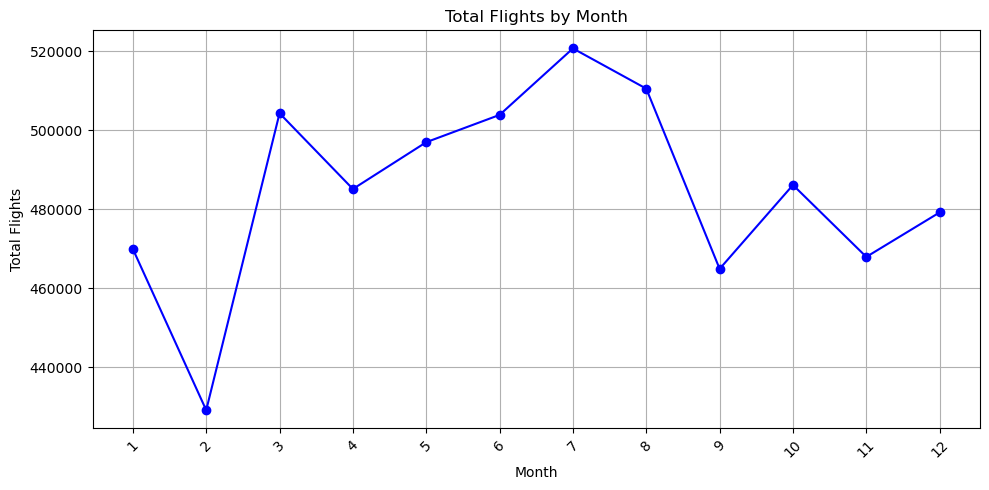

In [143]:
# Total flights by months (Line chart)
monthly_total = merged.groupby('MONTH').size().reset_index(name='NUMBER_OF_FLIGHTS')  # This creates the column

plt.figure(figsize=(10, 5))
plt.plot(monthly_total['MONTH'], monthly_total['NUMBER_OF_FLIGHTS'], marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Total Flights')
plt.title ('Total Flights by Month')
plt.xticks(ticks=monthly_total['MONTH'], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### ii. Delayed Flights by Months

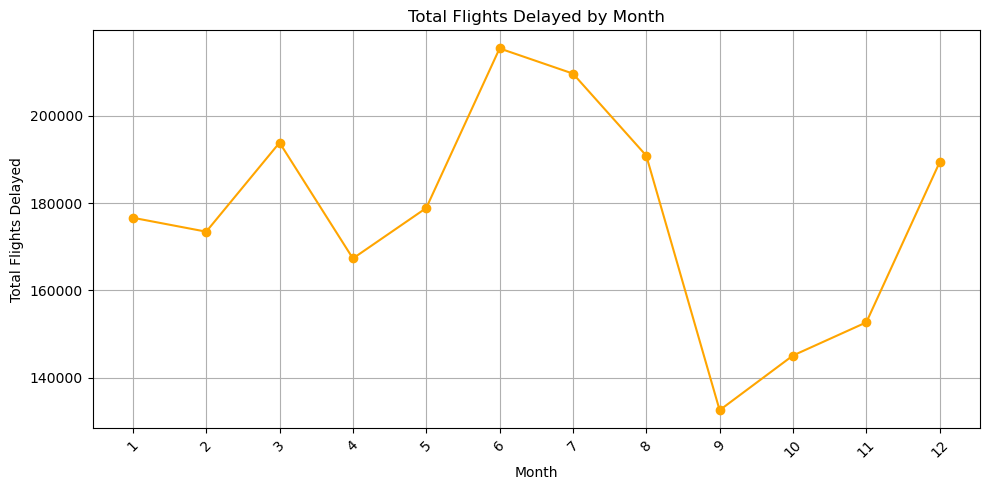

In [18]:
# Filter delayed flights by month (Line Chart)
delayed_only = merged[merged['DELAY_STATUS'] == 'Delayed']
monthly_delayed = delayed_only.groupby('MONTH').size().reset_index(name='NUMBER_OF_DELAYED_FLIGHTS')

plt.figure(figsize=(10, 5))
plt.plot(monthly_delayed['MONTH'], monthly_delayed['NUMBER_OF_DELAYED_FLIGHTS'], marker='o', linestyle='-', color='orange')
#plt.plot(monthly_avg_visits['Month'], monthly_avg_visits['Visit_Count'], marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Total Flights Delayed')
plt.title ('Total Flights Delayed by Month')
plt.xticks(ticks=monthly_delayed['MONTH'], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### iii. Flights by Airline

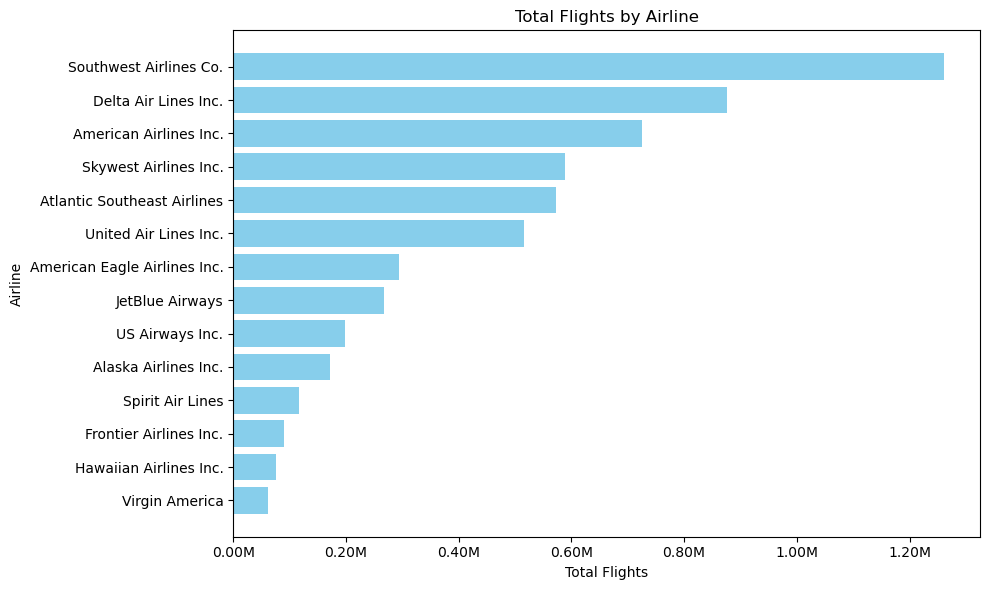

In [48]:
# Total Flights by Airlines (Bar Chart)
total_airline = merged.groupby('AIRLINE').size().reset_index(name='NUMBER_OF_FLIGHTS')  # Count total flights by airline
total_airline_sorted = total_airline.sort_values(by='NUMBER_OF_FLIGHTS', ascending=True)  # Sort in ascending order for better visibility

plt.figure(figsize=(10, 6))
plt.barh(total_airline_sorted['AIRLINE'], total_airline_sorted['NUMBER_OF_FLIGHTS'], color='skyblue')
plt.xlabel('Total Flights')
plt.ylabel('Airline')
plt.title('Total Flights by Airline')
plt.tight_layout()

# Create the formatter for x-axis in millions 
formatter = FuncFormatter(lambda x, _: f'{x / 1_000_000:.2f}M')

plt.gca().xaxis.set_major_formatter(formatter)
plt.show()


#### iv. Delayed Flights by Airline

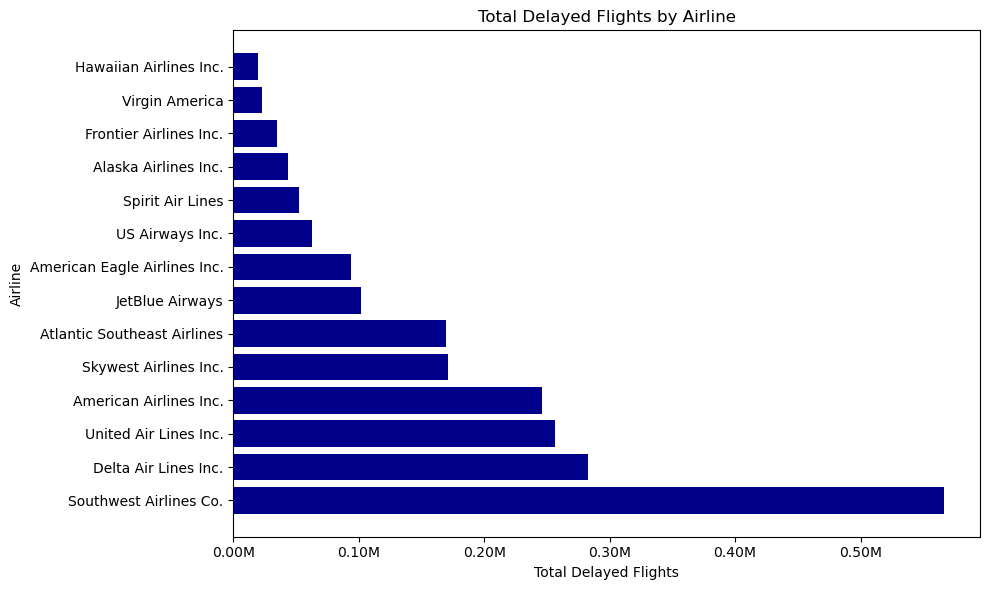

In [47]:
# Delayed Flights by Airline (Bar Chart)
total_delayed_airline = delayed_only.groupby('AIRLINE').size().reset_index(name='DELAYED_FLIGHTS')
total_delayed_airline_sorted = total_delayed_airline.sort_values(by='DELAYED_FLIGHTS', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(total_delayed_airline_sorted['AIRLINE'], total_delayed_airline_sorted['DELAYED_FLIGHTS'], color='darkblue')
plt.xlabel('Total Delayed Flights')
plt.ylabel('Airline')
plt.title('Total Delayed Flights by Airline')
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()


### B. Data Analysis

#### i. Trend Analysis

- Analyze the total number of flights operated and total number of flights delayed by month.
- Identify seasonal or flight trends by month.


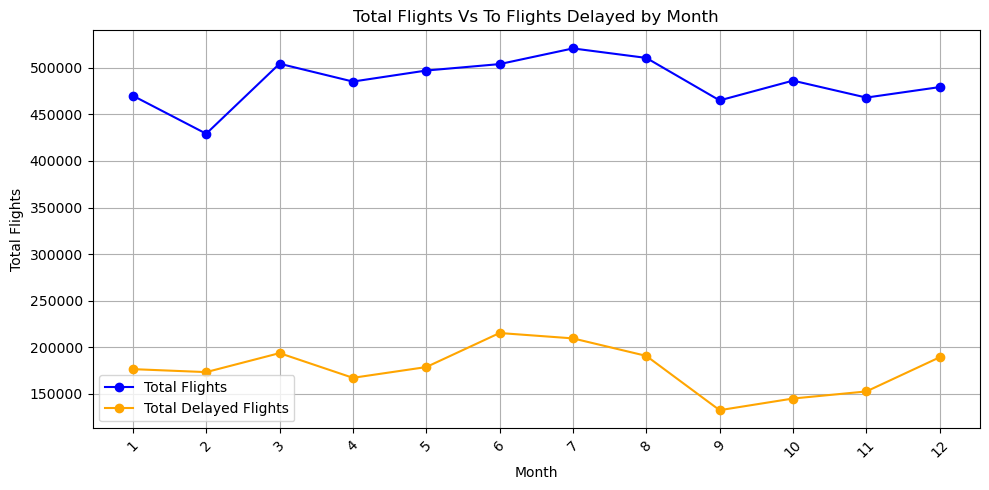

In [144]:
# Total flights n delayed flights by months (line chart)
 monthly_summary = pd.merge(monthly_total, monthly_delayed, on='MONTH', how='left')
monthly_summary['NUMBER_OF_DELAYED_FLIGHTS'].fillna(0)

plt.figure(figsize=(10, 5))
plt.plot(monthly_summary['MONTH'], monthly_summary['NUMBER_OF_FLIGHTS'], marker='o', linestyle='-', color='blue', label='Total Flights')
plt.plot(monthly_summary['MONTH'], monthly_summary['NUMBER_OF_DELAYED_FLIGHTS'], marker='o', linestyle='-', color='orange', label='Total Delayed Flights')
plt.xlabel('Month')
plt.ylabel('Total Flights')
plt.title ('Total Flights Vs To Flights Delayed by Month')
plt.xticks(ticks=monthly_total['MONTH'], rotation=45) # xticks - x axis label rotation
plt.grid(True)
plt.legend()
plt.tight_layout() # tight_layout -customization
plt.show()

#### ii. Descriptive Analysis

- Analyze the total number of flights operated and total number of flights delayed by airlines.
- Identify performance of airlines.


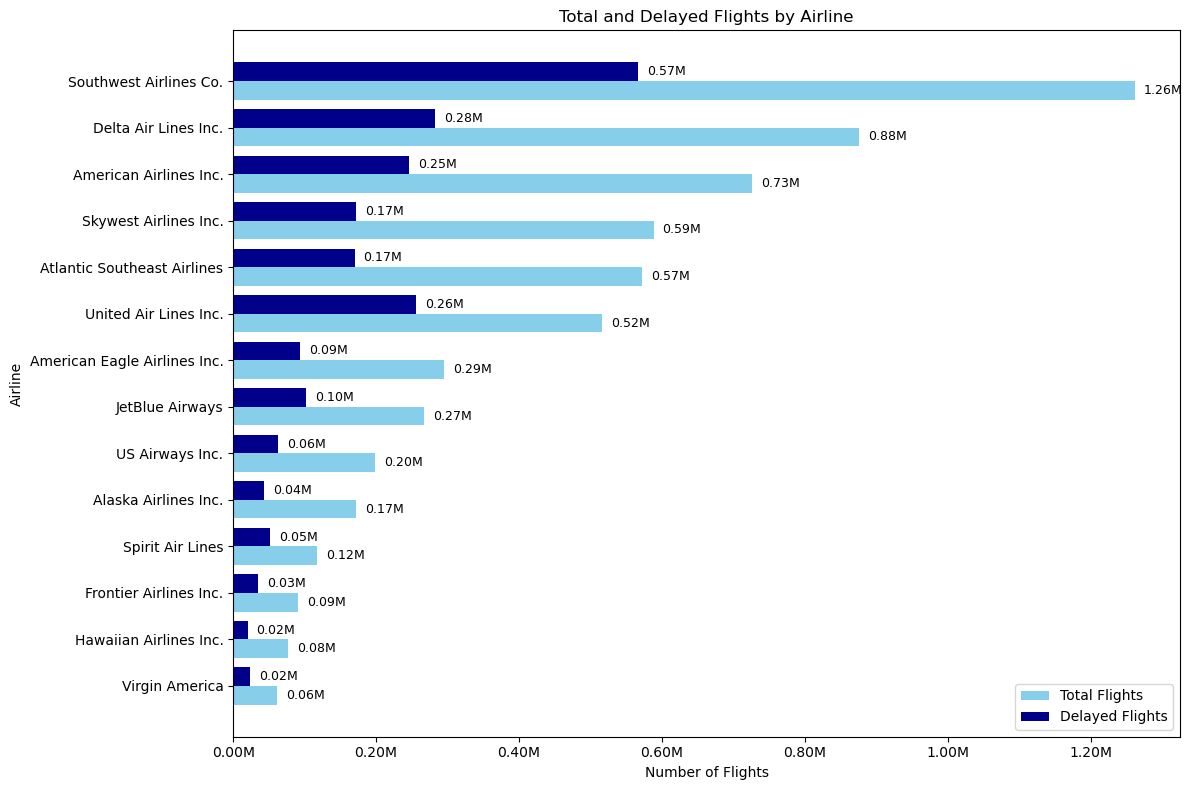

In [50]:
# Total flights n delayed flights by airlines (bar chart)
merged_flights = pd.merge(total_airline_sorted, total_delayed_airline, on='AIRLINE', how='left')
merged_flights['DELAYED_FLIGHTS'] = merged_flights['DELAYED_FLIGHTS'].fillna(0)

plt.figure(figsize=(12, 8))

n = len(merged_flights)
y_pos = np.arange(n)
bar_width = 0.4

bars_total = plt.barh(y_pos - bar_width/2, merged_flights['NUMBER_OF_FLIGHTS'], height=bar_width, color='skyblue', label='Total Flights')
bars_delayed = plt.barh(y_pos + bar_width/2, merged_flights['DELAYED_FLIGHTS'], height=bar_width, color='darkblue', label='Delayed Flights')

plt.yticks(y_pos, merged_flights['AIRLINE'])
plt.xlabel('Number of Flights')
plt.ylabel('Airline')
plt.title('Total and Delayed Flights by Airline')
plt.legend()
plt.tight_layout()


# Apply formatter to x-axis
plt.gca().xaxis.set_major_formatter(formatter)

# Use formatter for data labels
for bar in bars_total:
    width = bar.get_width()
    label = formatter(width, None)  # pass value + dummy "pos"
    plt.text(width + max(merged_flights['NUMBER_OF_FLIGHTS']) * 0.01,
             bar.get_y() + bar.get_height() / 2,
             label,
             va='center', ha='left', fontsize=9, color='black')

for bar in bars_delayed:
    width = bar.get_width()
    label = formatter(width, None)
    plt.text(width + max(merged_flights['NUMBER_OF_FLIGHTS']) * 0.01,
             bar.get_y() + bar.get_height() / 2,
             label,
             va='center', ha='left', fontsize=9, color='black')

plt.show()


#### iii. Correlation Analysis

**Airline Performance Benchmark**
- Assess the relationship between total flights and total flights delayed to asses airlines performance


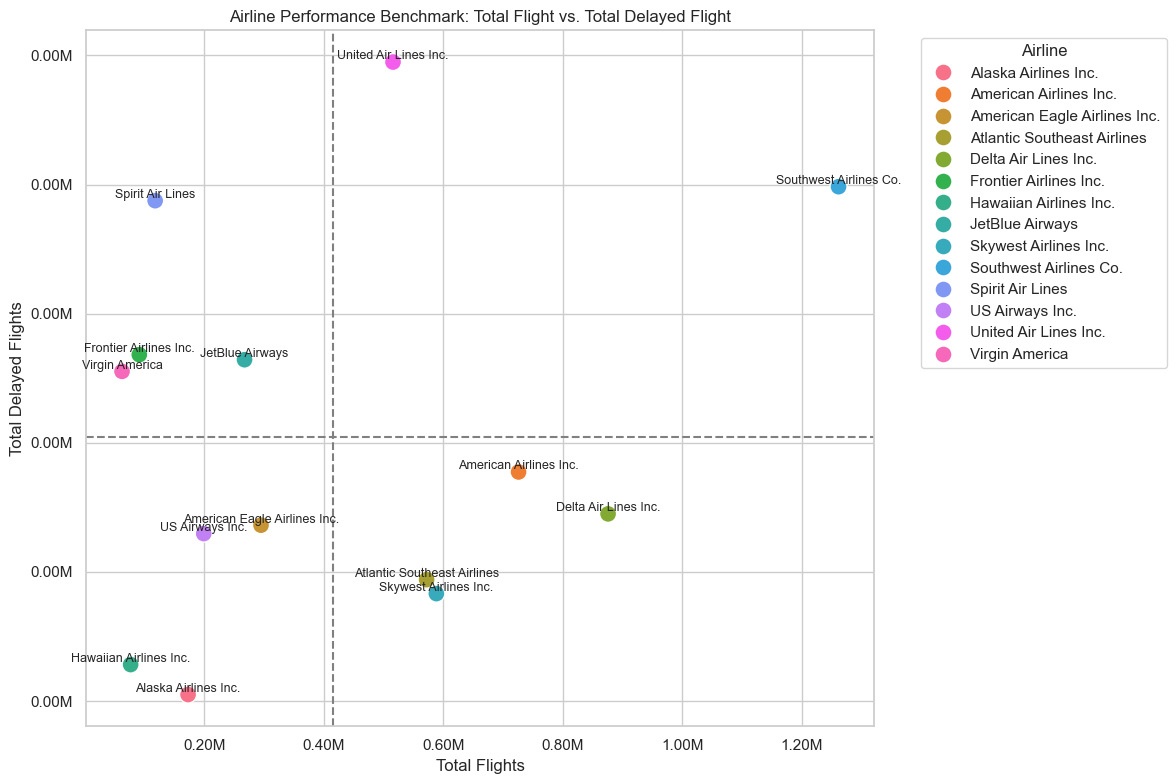

In [58]:
# Airline Performance Benchmark (Scatter plot)
airline_benchmark = pd.merge(total_airline, total_delayed_airline, on='AIRLINE')
airline_benchmark['DELAY_RATE'] = airline_benchmark['DELAYED_FLIGHTS'] / airline_benchmark['NUMBER_OF_FLIGHTS']

plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')
sns.scatterplot(
    data=airline_benchmark,
    x='NUMBER_OF_FLIGHTS',
    y='DELAY_RATE',
    hue='AIRLINE',
    s=150
)

avg_flights = airline_benchmark['NUMBER_OF_FLIGHTS'].mean()
avg_delay_rate = airline_benchmark['DELAY_RATE'].mean()
plt.axvline(avg_flights, color='gray', linestyle='--')
plt.axhline(avg_delay_rate, color='gray', linestyle='--')
for _, row in airline_benchmark.iterrows():
    plt.text(row['NUMBER_OF_FLIGHTS'], row['DELAY_RATE'] + 0.001, row['AIRLINE'],
             fontsize=9, ha='center')

plt.title('Airline Performance Benchmark: Total Flight vs. Total Delayed Flight')
plt.xlabel('Total Flights')
# Apply formatter to x-axis
plt.gca().xaxis.set_major_formatter(formatter)
plt.ylabel('Total Delayed Flights')
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



## 5️⃣ Data Insights

- July had the highest number of flights, reflecting summer travel peaks.  
- June experienced more delays than July, indicating operational inefficiencies.  
- Southwest Airlines had the highest flight volume.  
- American Airlines and Delta Airlines achieved high volume with lower delays, showing greater reliability.
